In [ ]:
"""estimator_demo_simulator.ipynb"""

# Cell 01 - Create a Bell State (|00> + |11>)

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

qc.draw(output="mpl")

fake_almaden   : Qubits = 20: Gates = ['id', 'u1', 'u2', 'u3', 'cx']


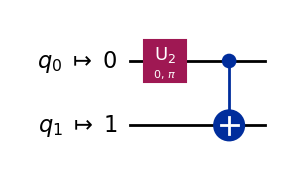

Job ID: 5b593339-b9bf-4cd8-aa2f-b5baf69597e0


In [ ]:
# Cell 02 - Run circuit on a target backend

from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()
config = backend.configuration()
print(
    f"{config.backend_name:15}: Qubits = {config.n_qubits}: Gates = {config.basis_gates}"
)

# Transpile the quantum circuit for the target backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# Display how the circuit will actually run on the target backend
display(isa_circuit.draw("mpl", idle_wires=False))

estimator = Estimator(backend)
estimator.options.default_shots = 5000

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]

job = estimator.run([(isa_circuit, mapped_observables)])

print(f"Job ID: {job.job_id()}")

In [ ]:
# Cell 03 - Wait for job to complete and plot the results

from matplotlib import pyplot as plt

job_result = job.result()
pub_result = job.result()[0]

values = pub_result.data.evs
errors = pub_result.data.stds

plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()